In [3]:
import pandas as pd
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

In [4]:
df_submission = pd.read_csv("..\studentsubmissions.csv")
df_student = pd.read_csv("..\students.csv")
df_merged = df_student.merge(df_submission, how='inner', on=('userId', 'courseId'))

In [5]:
df_out = df_merged[["profile.name.fullName","profile.emailAddress"]]
df_out = df_out.drop_duplicates()
df_out = df_out.set_index('profile.emailAddress')

In [6]:
df_out["Created"]=df_merged[df_merged.state == 'CREATED'].groupby('profile.emailAddress').state.count()
df_out["Submitted"]=df_merged[df_merged.state == 'TURNED_IN'].groupby('profile.emailAddress').state.count()
df_out["Returned"]=df_merged[df_merged.state == 'RETURNED'].groupby('profile.emailAddress').state.count()
df_out.fillna(0, inplace=True)
df_out["Total Assignments"]=df_out["Created"]+df_out["Submitted"]+df_out["Returned"]
df_out = df_out.rename({"profile.name.fullName":"Student Name"}, axis='columns')

In [7]:
df_out

,Student Name,Created,Submitted,Returned,Total Assignments
profile.emailAddress,,,,,
roland.phillips@studentgps.org,Roland Phillips,2.0,0.0,1,3.0
peter.nash@studentgps.org,Peter Nash,2.0,0.0,1,3.0
larry.mahoney@studentgps.org,Larry Mahoney,2.0,0.0,1,3.0
kyle.hughes@studentgps.org,Kyle Hughes,2.0,1.0,2,5.0
mary.archer@studentgps.org,Mary Archer,1.0,1.0,3,5.0
micheal.turner@studentgps.org,Micheal Turner,1.0,0.0,1,2.0
stephen.caldwell@studentgps.org,Stephen Caldwell,0.0,1.0,1,2.0
olivia.hardy@studentgps.org,Olivia Hardy,0.0,0.0,2,2.0


Text(0, 0.5, 'Assignment Counts')

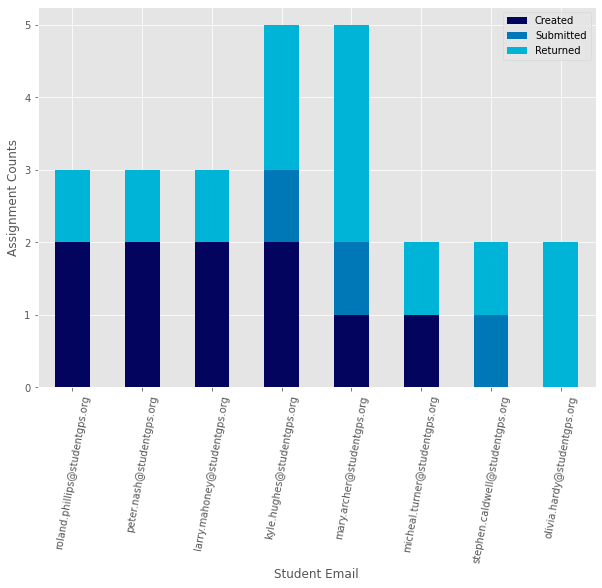

In [8]:
colors = ["#03045E", "#0077B6","#00B4D8"]
ax = df_out.loc[:,['Created','Submitted', 'Returned']].plot.bar(stacked=True, color=colors, figsize=(10,7), rot=80)
ax.set_xlabel("Student Email")
ax.set_ylabel("Assignment Counts")
